SGDClassifier


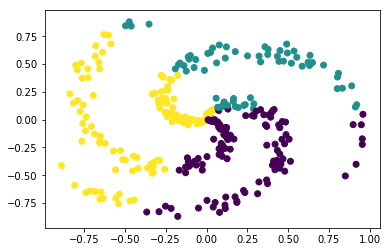

Confusion Matrix:

 (0, 1, 2)
 ---------
[[62.  7. 47.]
 [16. 47.  4.]
 [22. 46. 49.]]


MLPClassifier


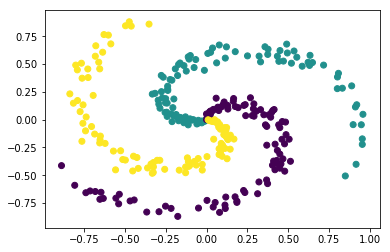

Confusion Matrix:

 (0, 1, 2)
 ---------
[[100.   1.   1.]
 [  0.  99.   0.]
 [  0.   0.  99.]]




In [37]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import csv

def read_data():
    with open("spiral.csv", 'r') as f:
        data = list(csv.reader(f))
    
    entries = []
    classes = []
    for p in data[1:]:
        entries.append([float(p[0]), float(p[1])])
        classes.append(int(p[2]))
        
    return (entries, classes)
    

def plot(classifier, entries):
    color_map = {
        0: 0.6,
        1: 0.7,
        2: 0.8,
    }
    c = []
    x = []
    y = []
    cls = classifier.predict(entries)
    
    for i, entry in enumerate(entries):
        x.append(entry[0])
        y.append(entry[1])
        c.append(color_map[cls[i]])

    plt.scatter(x, y, c=c)
    plt.show()
    

def confusion_matrix(classifier, entries, classes, class_values):
    
    m = np.zeros((len(class_values), len(class_values)))
    
    # looks up the index of a class value from it's value
    index_dict = {v: i for i, v in enumerate(class_values)}
    
    for i, actual_class in enumerate(classes):
        entry = entries[i]
        predicted_class = classifier.predict([entry])[0]
        predicted_index = index_dict[predicted_class]
        actual_index = index_dict[actual_class]
        m[predicted_index][actual_index] += 1
    
    return m


def print_confusion_matrix(cm, class_values):
    val_str = str(class_values)
    print("Confusion Matrix:\n")
    print(f" {val_str}")
    print(f" {'-' * len(val_str)}")
    print(f"{cm}\n\n")


    

#---------------------------START

entries, classes = read_data()

sgd = SGDClassifier(loss="hinge", penalty="l2", tol=1e-3, max_iter=1000)
sgd.fit(entries, classes)

mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(72,))
mlp.fit(entries, classes)

CLASS_VALUES = (0, 1, 2)

print("SGDClassifier")
plot(sgd, entries)

cm = confusion_matrix(sgd, entries, classes, CLASS_VALUES)
print_confusion_matrix(cm, CLASS_VALUES)

print("MLPClassifier")
plot(mlp, entries)

cm = confusion_matrix(mlp, entries, classes, CLASS_VALUES)
print_confusion_matrix(cm, CLASS_VALUES)




